![gym](gym.png)


You are a product manager for a fitness studio and are interested in understanding the current demand for digital fitness classes. You plan to conduct a market analysis in Python to gauge demand and identify potential areas for growth of digital products and services.

### The Data

You are provided with a number of CSV files in the "Files/data" folder, which offer international and national-level data on Google Trends keyword searches related to fitness and related products. 

### workout.csv

| Column     | Description              |
|------------|--------------------------|
| `'month'` | Month when the data was measured. |
| `'workout_worldwide'` | Index representing the popularity of the keyword 'workout', on a scale of 0 to 100. |

### three_keywords.csv

| Column     | Description              |
|------------|--------------------------|
| `'month'` | Month when the data was measured. |
| `'home_workout_worldwide'` | Index representing the popularity of the keyword 'home workout', on a scale of 0 to 100. |
| `'gym_workout_worldwide'` | Index representing the popularity of the keyword 'gym workout', on a scale of 0 to 100. |
| `'home_gym_worldwide'` | Index representing the popularity of the keyword 'home gym', on a scale of 0 to 100. |

### workout_geo.csv

| Column     | Description              |
|------------|--------------------------|
| `'country'` | Country where the data was measured. |
| `'workout_2018_2023'` | Index representing the popularity of the keyword 'workout' during the 5 year period. |

### three_keywords_geo.csv

| Column     | Description              |
|------------|--------------------------|
| `'country'` | Country where the data was measured. |
| `'home_workout_2018_2023'` | Index representing the popularity of the keyword 'home workout' during the 5 year period. |
| `'gym_workout_2018_2023'` | Index representing the popularity of the keyword 'gym workout' during the 5 year period.  |
| `'home_gym_2018_2023'` | Index representing the popularity of the keyword 'home gym' during the 5 year period. |

In [137]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [138]:
# Start coding here

workout=pd.read_csv('data/workout.csv')
print(workout.head(5))
print(workout.isna().sum())
max_workout_worldwide=workout['workout_worldwide'].max()

workout_colum=workout.loc[workout['workout_worldwide']==max_workout_worldwide]

year_str=workout_colum['month'].str[:4].iloc[0]

# When was the global search for 'workout' at its peak?

print(year_str)

     month  workout_worldwide
0  2018-03                 59
1  2018-04                 61
2  2018-05                 57
3  2018-06                 56
4  2018-07                 51
month                0
workout_worldwide    0
dtype: int64
2020


     month  home_workout_worldwide  gym_workout_worldwide  home_gym_worldwide
0  2018-03                      12                     16                  10
1  2018-04                      12                     18                  10
2  2018-05                      13                     16                   9
3  2018-06                      12                     17                   9
4  2018-07                      12                     17                   9
month                0
workout_worldwide    0
dtype: int64
home_workout_worldwide
gym_workout_worldwide


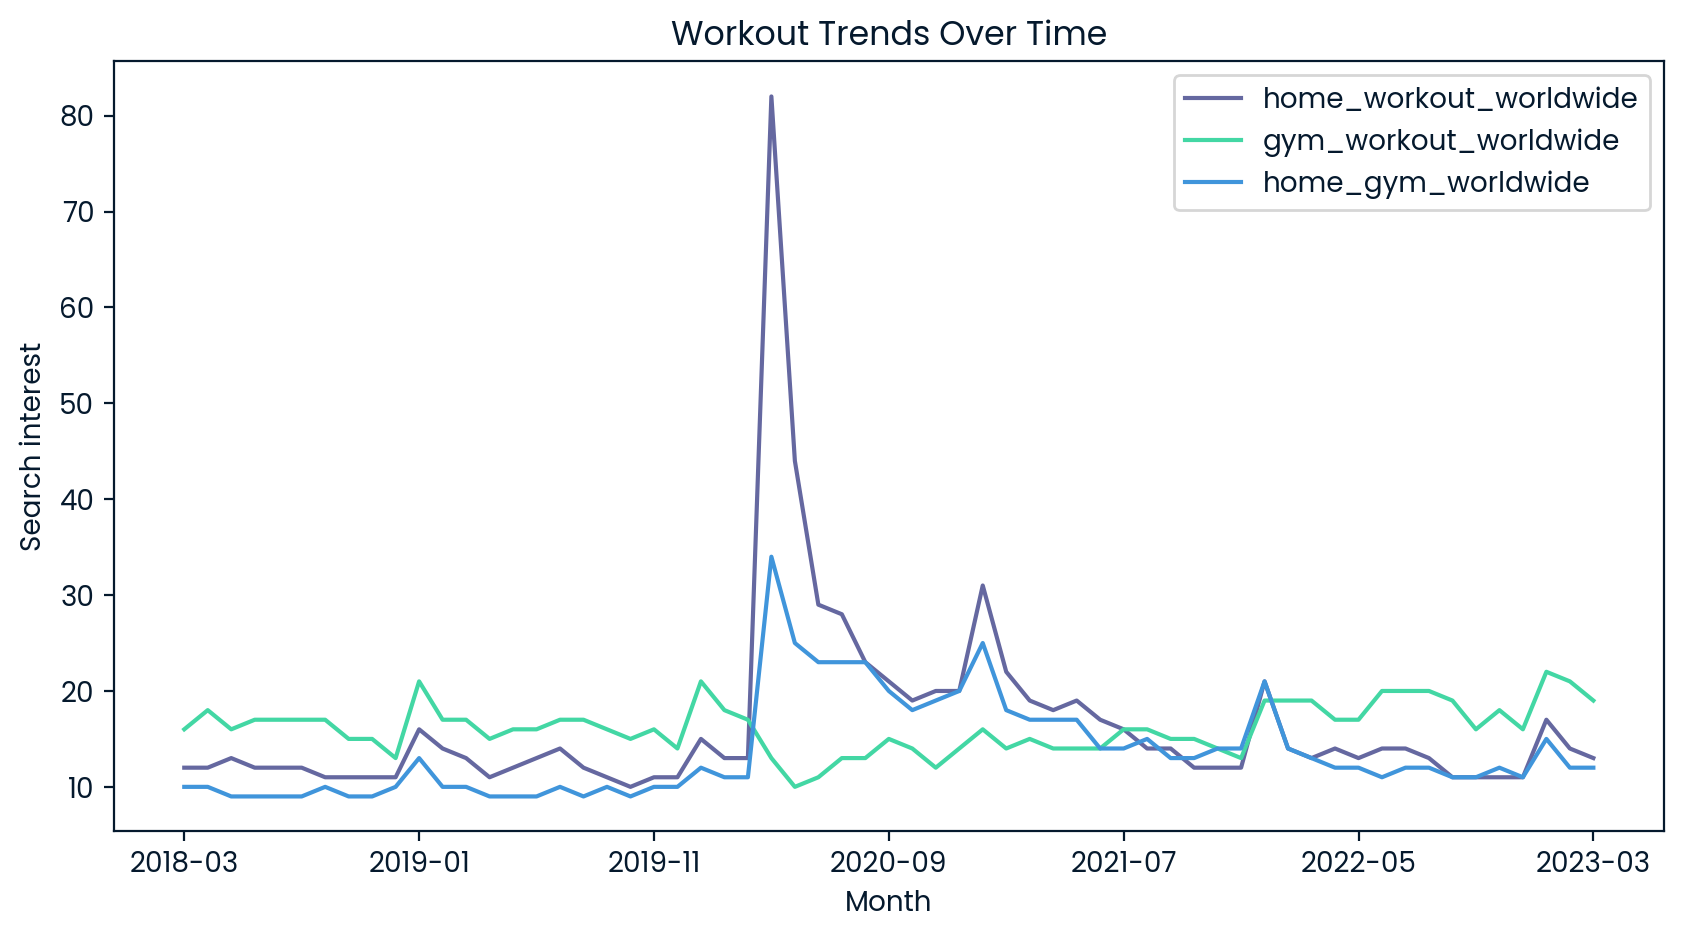

In [139]:
# Of the keywords available, what was the most popular during the covid pandemic, and what is the most popular now? 
three_keywords=pd.read_csv('data/three_keywords.csv')
print(three_keywords.head(5))
print(workout.isna().sum())

three_keywords_pademic=three_keywords.loc[ (three_keywords['month'] >= '2020-01' ) & (three_keywords['month'] < '2023-05' ) ]
peak_covid = three_keywords_pademic[['home_workout_worldwide','gym_workout_worldwide','home_gym_worldwide']].max().idxmax()
print(peak_covid)

three_keywords_now=three_keywords.sort_values(by='month',ascending=False)
current_head=three_keywords_now.head(1)
#.idxmax() Obtiene el nombre (label/etiqueta) del índice donde está el valor máximo
current=current_head[['home_workout_worldwide','gym_workout_worldwide','home_gym_worldwide']].max().idxmax()
print(current)


three_keywords.plot(
    x='month',
    y=['home_workout_worldwide',
       'gym_workout_worldwide',
       'home_gym_worldwide'],
    kind='line',
    figsize=(10,5)
)

plt.xlabel('Month')
plt.ylabel('Search interest')
plt.title('Workout Trends Over Time')
plt.show()


In [140]:
# What country has the highest interest for workouts among the following: United States, Australia, or Japan?

workout_geo=pd.read_csv('data/workout_geo.csv')
print(workout_geo.head(5)) 
print(workout_geo.isna().sum())

workout_geo_country=workout_geo.loc[(workout_geo['country']=='United States') |  (workout_geo['country']=='Australia') | (workout_geo['country']=='Japan')]

idx = workout_geo_country['workout_2018_2023'].idxmax()
top_country = workout_geo_country.loc[idx, 'country']
print(top_country)

                             country  workout_2018_2023
0                               Guam                NaN
1  Falkland Islands (Islas Malvinas)                NaN
2                       Cook Islands                NaN
3                             Brunei                NaN
4                              Palau                NaN
country                0
workout_2018_2023    189
dtype: int64
United States


     Country  home_workout_2018_2023  gym_workout_2018_2023  home_gym_2018_2023
0  Gibraltar                     NaN                    NaN                 NaN
1    Lesotho                     NaN                    NaN                 NaN
2       Guam                     NaN                    NaN                 NaN
3   Botswana                     NaN                    NaN                 NaN
4     Brunei                     NaN                    NaN                 NaN
Country                     0
home_workout_2018_2023    203
gym_workout_2018_2023     203
home_gym_2018_2023        203
dtype: int64
Philippines


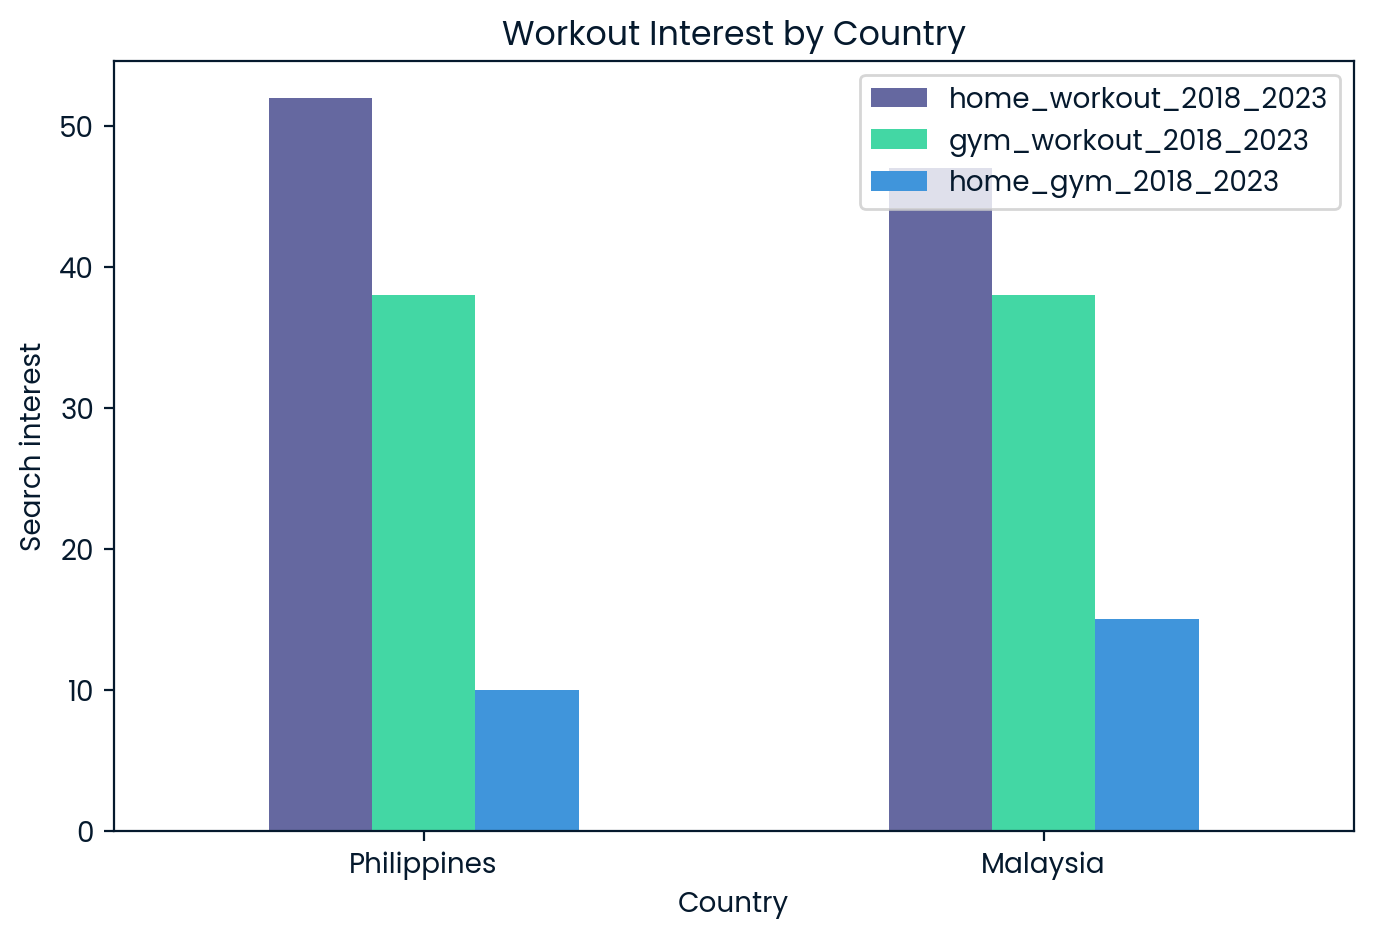

In [143]:
#You'd be interested in expanding your virtual home workouts offering to either the Philippines or Malaysia. Which of the two countries has the highest interest in home workouts? I
three_keywords_geo=pd.read_csv('data/three_keywords_geo.csv')
print(three_keywords_geo.head(5)) 
print(three_keywords_geo.isna().sum())

three_keywords_geo_Country = three_keywords_geo[ three_keywords_geo['Country'].isin(['Philippines', 'Malaysia'])]

idx_geo = three_keywords_geo_Country['home_workout_2018_2023'].idxmax()
home_workout_geo=three_keywords_geo_Country.loc[idx_geo,'Country']
print(home_workout_geo)


three_keywords_geo_Country.plot(
    x='Country',
    y=[
        'home_workout_2018_2023',
        'gym_workout_2018_2023',
        'home_gym_2018_2023'
    ],
    kind='bar',
    figsize=(8,5)
)

plt.ylabel('Search interest')
plt.title('Workout Interest by Country')
plt.xticks(rotation=0)
plt.show()
